In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
import sys,os
import rdkit
import networkx as nx
import pandas as pd

In [4]:
from rdkit.Chem import Draw 
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)

In [5]:
df=pd.read_csv("../input/tox21.csv")

In [7]:
df.head()

NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
0    0.0        0.0     1.0           NaN    NaN        0.0            0.0   
1    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
2    NaN        NaN     NaN           NaN    NaN        NaN            NaN   
3    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
4    0.0        0.0     0.0           0.0    0.0        0.0            0.0   

   SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53    mol_id  \
0     1.0       0.0     0.0     0.0     0.0   TOX3021   
1     NaN       0.0     NaN     0.0     0.0   TOX3020   
2     0.0       NaN     0.0     NaN     NaN   TOX3024   
3     NaN       0.0     NaN     0.0     0.0   TOX3027   
4     0.0       0.0     0.0     0.0     0.0  TOX20800   

                                              smiles  
0                       CCOc1ccc2nc(S(N)(=O)=O)sc2c1  
1                          CCN1C(=O)NC(c2ccccc2)C1=O  
2  CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...  
3                    CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  
4                          CC(O)(P(=O)(O)O)P(=O)(O)O

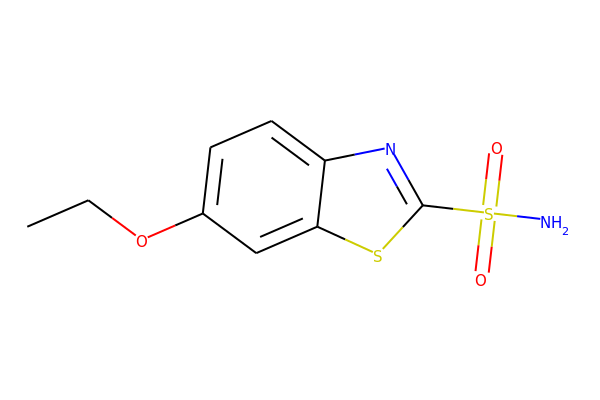

In [8]:
Chem.MolFromSmiles(df.iloc[0]['smiles'])

In [9]:
 tox21_tasks = [
      'NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
      'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'
  ]

In [11]:
def get_featurizer(featurizer):
  if featurizer == 'ECFP':
    featurizer = deepchem.feat.CircularFingerprint(size=1024)
  elif featurizer == 'GraphConv':
    featurizer = deepchem.feat.ConvMolFeaturizer()
  elif featurizer == 'Weave':
    featurizer = deepchem.feat.WeaveFeaturizer()
  elif featurizer == 'Raw':
    featurizer = deepchem.feat.RawFeaturizer()
  elif featurizer == 'AdjacencyConv':
    featurizer = deepchem.feat.AdjacencyFingerprint(
        max_n_atoms=150, max_valence=6)
  return featurizer

In [12]:
mol=Chem.MolFromSmiles(df.iloc[0]['smiles'])

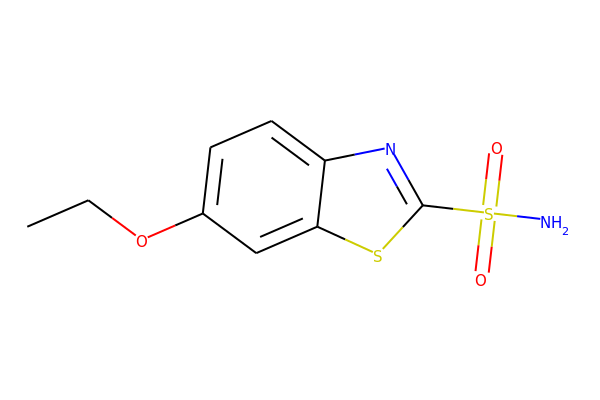

In [13]:
mol

In [24]:
AllChem.Compute2DCoords(mol)

0

In [25]:
print(Chem.MolToMolBlock(mol))


     RDKit          2D

 16 17  0  0  0  0  0  0  0  0999 V2000
   -6.5050   -0.5242    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1286    0.0721    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9240   -0.8217    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5476   -0.2254    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3759    1.2647    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9995    1.8611    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2051    0.9672    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6754    1.2644    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.4123   -0.0421    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9025   -0.2139    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    5.3926   -0.3857    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.7307   -1.7040    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.0742    1.2762    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3975   -1.1467    0

In [26]:
 AllChem.EmbedMolecule(mol)

0

In [27]:
print(Chem.MolToMolBlock(mol))


     RDKit          3D

 16 17  0  0  0  0  0  0  0  0999 V2000
    4.6563    1.7237    0.1918 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.8404    0.2805    0.5944 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0605   -0.6080   -0.1651 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7059   -0.6153   -0.2620 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0903   -1.5500   -1.0472 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7420   -1.6285   -1.2002 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1290   -0.7348   -0.5476 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4270   -0.7147   -0.6188 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1156    0.1886    0.0537 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8623    0.4320    0.1301 S   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2553    1.5335   -1.1489 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5611   -0.8581   -0.1642 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2254    0.9986    1.4565 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8706    1.0700    0

In [99]:
from rdkit.Chem import Descriptors, Descriptors3D, GraphDescriptors, rdMolDescriptors

In [51]:
mol2=Chem.MolFromSmiles('Cc1ccccc1')
AllChem.Compute2DCoords(mol2)
AllChem.EmbedMolecule(mol2)

0

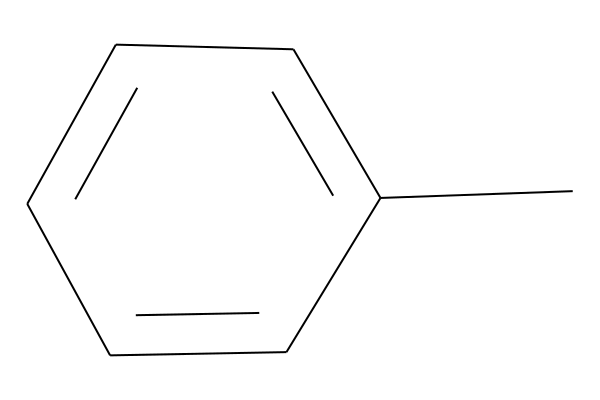

In [52]:
mol2

In [53]:
Descriptors.ExactMolWt(mol),Descriptors.ExactMolWt(mol2)

(258.01328418, 92.062600256)

In [30]:
Descriptors.FpDensityMorgan1(mol),\
Descriptors.FpDensityMorgan2(mol),\
Descriptors.FpDensityMorgan3(mol)

(1.5, 2.25, 2.875)

In [54]:
Descriptors.FpDensityMorgan1(mol2),\
Descriptors.FpDensityMorgan2(mol2),\
Descriptors.FpDensityMorgan3(mol2)

(1.0, 1.5714285714285714, 1.8571428571428572)

In [56]:
Descriptors.HeavyAtomMolWt(mol), Descriptors.HeavyAtomMolWt(mol2),

(248.24399999999997, 84.07699999999998)

In [59]:
Descriptors.MaxAbsPartialCharge(mol),Descriptors.MaxAbsPartialCharge(mol2)

(0.493834038312308, 0.06224908578199481)

In [60]:
Descriptors.MaxAbsPartialCharge(mol,force=True),Descriptors.MaxAbsPartialCharge(mol2,force=True)

(0.493834038312308, 0.06224908578199481)

In [61]:
Descriptors.MaxPartialCharge(mol),Descriptors.MaxPartialCharge(mol2)

(0.2649058712178131, -0.039774526323627504)

In [62]:
Descriptors.MinAbsPartialCharge(mol),Descriptors.MinAbsPartialCharge(mol2)

(0.2649058712178131, 0.039774526323627504)

In [63]:
Descriptors.MinPartialCharge(mol),Descriptors.MinPartialCharge(mol2)

(-0.493834038312308, -0.06224908578199481)

In [64]:
Descriptors.MolWt(mol),Descriptors.MolWt(mol2)

(258.32399999999996, 92.14099999999999)

In [65]:
Descriptors.NumRadicalElectrons(mol),Descriptors.NumRadicalElectrons(mol2)

(0, 0)

In [66]:
Descriptors.NumValenceElectrons(mol),Descriptors.NumValenceElectrons(mol2)

(86, 36)

In [69]:
Descriptors3D.Asphericity(mol),Descriptors3D.Asphericity(mol2)

(0.6701640004185805, 0.35827654452060614)

In [70]:
Descriptors3D.Eccentricity(mol),Descriptors3D.Eccentricity(mol2)

(0.9920793061182601, 0.9507298472246543)

In [71]:
Descriptors3D.InertialShapeFactor(mol),Descriptors3D.InertialShapeFactor(mol2)

(0.0027464312342939446, 0.0100775816849737)

In [72]:
Descriptors3D.NPR1(mol),Descriptors3D.NPR1(mol2)

(0.12561309793135209, 0.31002057608517786)

In [73]:
Descriptors3D.NPR2(mol),Descriptors3D.NPR2(mol2)

(0.9225537825878766, 0.6899794239578865)

In [75]:
Descriptors3D.PMI1(mol),Descriptors3D.PMI1(mol2)

(335.9100242773956, 68.46676569108725)

In [76]:
Descriptors3D.PMI3(mol),Descriptors3D.PMI3(mol2)

(2674.1639988926268, 220.84587595978167)

In [74]:
Descriptors3D.PMI2(mol),Descriptors3D.PMI2(mol2)

(2467.060112438715, 152.379110278205)

In [77]:
Descriptors3D.RadiusOfGyration(mol),Descriptors3D.RadiusOfGyration(mol2)

(3.3214086349904757, 1.620712730169088)

In [78]:
Descriptors3D.SpherocityIndex(mol),Descriptors3D.SpherocityIndex(mol2)

(0.07504272855906657, 6.4596420751175e-11)

In [80]:
GraphDescriptors.BalabanJ(mol),GraphDescriptors.BalabanJ(mol2)

(2.5417251486516017, 3.0214653097240864)

In [81]:
GraphDescriptors.BertzCT(mol),GraphDescriptors.BertzCT(mol2)

(618.7158480810886, 129.96566024533826)

In [82]:
GraphDescriptors.Chi0(mol),GraphDescriptors.Chi0(mol2)

(11.759148545064338, 5.112884175122364)

In [83]:
GraphDescriptors.Chi0n(mol),GraphDescriptors.Chi0n(mol2)

(8.504962905764325, 4.386751345948129)

In [84]:
GraphDescriptors.Chi0v(mol),GraphDescriptors.Chi0v(mol2)

(10.137956067619777, 4.386751345948129)

In [85]:
GraphDescriptors.Chi1v(mol),GraphDescriptors.Chi1v(mol2)

(6.929377616499767, 2.4106836025229597)

In [89]:
GraphDescriptors.HallKierAlpha(mol),GraphDescriptors.HallKierAlpha(mol2)

(-1.1800000000000002, -0.78)

In [90]:
GraphDescriptors.Ipc(mol),GraphDescriptors.Ipc(mol2)

(4725.855771246967, 47.19725257297226)

In [93]:
GraphDescriptors.Ipc(mol, avg=1),GraphDescriptors.Ipc(mol2,avg=1)

(2.600911266509063, 1.6856161633204378)

In [94]:
GraphDescriptors.Kappa1(mol),GraphDescriptors.Kappa1(mol2)

(11.309706415889247, 4.380771704180065)

In [97]:
GraphDescriptors.Kappa2(mol),GraphDescriptors.Kappa2(mol2)

(4.003138159763861, 1.7832860398554335)

In [98]:
GraphDescriptors.Kappa3(mol),GraphDescriptors.Kappa3(mol2)

(2.1564283130931607, 1.0382641324115067)

In [103]:
a,b=rdMolDescriptors.CalcAUTOCORR2D(mol),rdMolDescriptors.CalcAUTOCORR2D(mol2)
np.array([a,b])

array([[ 3.4420e+00,  3.7780e+00,  3.6730e+00,  3.3580e+00,  3.1160e+00,
         2.8930e+00,  2.3920e+00,  2.0150e+00,  2.8390e+00,  3.1370e+00,
         3.0420e+00,  2.8480e+00,  2.5800e+00,  2.3190e+00,  1.7060e+00,
         1.4760e+00,  3.0110e+00,  3.4260e+00,  3.2890e+00,  3.0810e+00,
         2.8750e+00,  2.6600e+00,  2.2300e+00,  1.7730e+00,  2.8700e+00,
         3.1350e+00,  3.0560e+00,  2.8240e+00,  2.5460e+00,  2.2070e+00,
         1.6030e+00,  1.4310e+00,  2.9530e+00,  3.3870e+00,  3.2540e+00,
         3.0350e+00,  2.8300e+00,  2.6200e+00,  2.1630e+00,  1.7280e+00,
         4.4790e+00,  5.3490e+00,  5.1890e+00,  4.6640e+00,  5.0220e+00,
         4.5790e+00,  4.0790e+00,  2.8280e+00,  2.1840e+00,  3.9980e+00,
         2.6970e+00,  1.9420e+00,  1.6000e+00,  7.8500e-01,  5.3200e-01,
         4.6200e-01,  2.7600e-01,  4.4700e-01,  4.0900e-01,  2.2300e-01,
         1.8600e-01,  1.6500e-01,  1.7200e-01,  5.3000e-02,  1.2500e-01,
         2.9400e-01,  1.7200e-01,  1.8300e-01,  1.6

In [104]:
a,b=rdMolDescriptors.CalcAUTOCORR3D(mol),rdMolDescriptors.CalcAUTOCORR3D(mol2)
np.array([a,b])

array([[0.209, 0.526, 0.656, 0.705, 0.686, 0.629, 0.401, 0.305, 0.23 ,
        0.   , 0.387, 0.936, 1.189, 1.116, 1.076, 0.985, 0.683, 0.489,
        0.294, 0.   , 0.2  , 0.465, 0.596, 0.638, 0.597, 0.517, 0.298,
        0.255, 0.168, 0.   , 0.238, 0.628, 0.774, 0.817, 0.823, 0.767,
        0.564, 0.374, 0.293, 0.   , 0.211, 0.472, 0.612, 0.625, 0.577,
        0.447, 0.262, 0.238, 0.117, 0.   , 0.222, 0.601, 0.742, 0.775,
        0.783, 0.733, 0.518, 0.354, 0.284, 0.   , 1.034, 4.349, 5.242,
        4.135, 7.584, 5.657, 4.096, 1.231, 1.159, 0.   , 0.23 , 0.548,
        0.703, 0.729, 0.697, 0.617, 0.376, 0.307, 0.205, 0.   ],
       [0.464, 0.917, 0.751, 0.201, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.464, 0.917, 0.751, 0.201, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.464, 0.917, 0.751, 0.201, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.464, 0.917, 0.751, 0.201, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.464, 0.917, 0.751, 0.201, 0.   ,
        0.  

In [105]:
a,b=rdMolDescriptors.CalcAsphericity(mol),rdMolDescriptors.CalcAsphericity(mol2)
np.array([a,b])

array([0.670164  , 0.35827654])

In [106]:
a,b=rdMolDescriptors.CalcChi0v(mol),rdMolDescriptors.CalcChi0v(mol2)
np.array([a,b])

array([10.13795607,  4.38675135])

In [109]:
a,b=rdMolDescriptors.CalcChiNv(mol,10),rdMolDescriptors.CalcChiNv(mol2,10)
np.array([a,b])

array([0.10195357, 0.        ])

In [110]:
a,b=rdMolDescriptors.CalcCrippenDescriptors(mol),rdMolDescriptors.CalcCrippenDescriptors(mol2)
np.array([a,b])

array([[ 1.3424 , 62.1622 ],
       [ 1.99502, 31.179  ]])

In [116]:
a,b=rdMolDescriptors.CalcEEMcharges(mol),rdMolDescriptors.CalcEEMcharges(mol2)
print (len(a),len(b), mol.GetNumAtoms(), mol2.GetNumAtoms())
np.array([a,b])

16 7 16 7


array([list([0.07094594366552565, 0.31725502183767057, -0.5396816099104526, 0.24881896618799754, 0.009980057442430017, 0.015475869054320213, 0.1849901366507807, -0.2791216650742782, -0.3203463902779639, 1.8952892501230731, -0.46081244334828303, -0.7247659754659334, -0.768889547824013, 0.5373369003727182, -0.16778634908555407, -0.01868816434803723]),
       list([0.08603117664083125, -0.05030114419129607, -0.005404002382327079, -0.00939809966252199, -0.006479361772051491, -0.008799009371200683, -0.005649559261433938])],
      dtype=object)

In [117]:
a,b=rdMolDescriptors.CalcFractionCSP3(mol),rdMolDescriptors.CalcFractionCSP3(mol2)
np.array([a,b])

array([0.22222222, 0.14285714])

In [118]:
a,b=rdMolDescriptors.CalcGETAWAY(mol),rdMolDescriptors.CalcGETAWAY(mol2)
np.array([a,b])

array([[5.80000e+01, 9.06000e-01, 3.42100e+00, 1.17400e+01, 3.00000e+00,
        1.29500e+00, 9.27000e-01, 5.79000e-01, 2.24000e-01, 1.78000e-01,
        8.20000e-02, 0.00000e+00, 2.00000e-03, 9.95100e+00, 1.09200e+00,
        3.39000e-01, 7.74000e-01, 4.30000e-01, 3.09000e-01, 5.24000e-01,
        4.46000e-01, 2.22000e-01, 3.28000e-01, 9.00000e+00, 5.21900e+00,
        2.38200e+00, 1.56300e+00, 1.14500e+00, 2.60000e-01, 2.99000e-01,
        1.93000e-01, 0.00000e+00, 2.00000e-03, 1.73490e+01, 1.61000e+00,
        6.81000e-01, 1.26000e+00, 9.20000e-01, 4.49000e-01, 7.02000e-01,
        6.49000e-01, 3.68000e-01, 4.70000e-01, 1.40580e+01, 2.38900e+00,
        1.19800e+00, 7.59000e-01, 4.61000e-01, 1.93000e-01, 1.58000e-01,
        8.80000e-02, 0.00000e+00, 1.00000e-03, 8.39200e+00, 7.70000e-01,
        3.13000e-01, 4.88000e-01, 3.68000e-01, 2.94000e-01, 4.36000e-01,
        3.60000e-01, 1.44000e-01, 2.61000e-01, 6.95500e+00, 3.88100e+00,
        1.50600e+00, 1.17600e+00, 7.49000e-01, 2.60

In [119]:
a,b=rdMolDescriptors.CalcHallKierAlpha(mol),rdMolDescriptors.CalcHallKierAlpha(mol2)
np.array([a,b])

array([-1.18, -0.78])

In [120]:
a,b=rdMolDescriptors.CalcInertialShapeFactor(mol),rdMolDescriptors.CalcInertialShapeFactor(mol2)
np.array([a,b])

array([0.00274643, 0.01007758])

In [121]:
a,b=rdMolDescriptors.CalcLabuteASA(mol),rdMolDescriptors.CalcLabuteASA(mol2)
np.array([a,b])

array([96.91717495, 43.79634523])

In [124]:
a,b=rdMolDescriptors.CalcMORSE(mol),rdMolDescriptors.CalcMORSE(mol2)
a=np.array([a,b])
print (a.shape)
a

(2, 224)


array([[ 1.20000e+02,  1.23600e+01, -2.20700e+00, -4.86000e-01,
        -2.03200e+00,  1.44900e+00,  1.73600e+00, -1.14500e+00,
        -4.99000e-01,  4.20000e-01, -3.20000e-02,  6.32000e-01,
        -2.82000e-01, -6.38000e-01,  4.01000e-01,  1.06000e-01,
         2.04000e-01, -4.69000e-01, -3.52000e-01,  5.82000e-01,
        -4.60000e-02, -1.36000e-01, -3.10000e-02, -2.90000e-02,
         7.00000e-02, -1.21000e-01,  7.00000e-03, -1.90000e-02,
        -1.46000e-01,  1.18000e-01,  3.90000e-02, -1.16000e-01,
         1.97975e+02,  1.93200e+01, -3.55400e+00, -2.37200e+00,
        -2.38600e+00,  3.11400e+00,  1.94300e+00, -2.14700e+00,
        -1.41000e-01,  9.54000e-01, -3.10000e-01,  6.54000e-01,
        -1.55000e-01, -8.78000e-01,  4.35000e-01,  1.07000e-01,
         2.82000e-01, -6.75000e-01, -3.15000e-01,  9.77000e-01,
        -3.34000e-01, -2.90000e-01,  2.65000e-01,  8.50000e-02,
        -8.50000e-02, -2.80000e-01,  1.86000e-01,  1.03000e-01,
        -4.31000e-01,  3.40000e-02,  2.4

In [125]:
a,b=rdMolDescriptors.CalcMolFormula(mol),rdMolDescriptors.CalcMolFormula(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array(['C9H10N2O3S2', 'C7H8'], dtype='<U11')

In [126]:
a,b=rdMolDescriptors.CalcNumAliphaticCarbocycles(mol),rdMolDescriptors.CalcNumAliphaticCarbocycles(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([0, 0])

In [127]:
a,b=rdMolDescriptors.CalcNumAliphaticHeterocycles(mol),rdMolDescriptors.CalcNumAliphaticHeterocycles(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([0, 0])

In [128]:
a,b=rdMolDescriptors.CalcNumAliphaticRings(mol),rdMolDescriptors.CalcNumAliphaticRings(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([0, 0])

In [129]:
a,b=rdMolDescriptors.CalcNumAmideBonds(mol),rdMolDescriptors.CalcNumAmideBonds(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([0, 0])

In [130]:
a,b=rdMolDescriptors.CalcNumBridgeheadAtoms(mol),rdMolDescriptors.CalcNumBridgeheadAtoms(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([0, 0])

In [131]:
a,b=rdMolDescriptors.CalcNumHBA(mol),rdMolDescriptors.CalcNumHBA(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([5, 0])

In [132]:
a,b=rdMolDescriptors.CalcNumRings(mol),rdMolDescriptors.CalcNumRings(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([2, 1])

In [133]:
a,b=rdMolDescriptors.CalcNumRotatableBonds(mol),rdMolDescriptors.CalcNumRotatableBonds(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([3, 0])

In [134]:
a,b=rdMolDescriptors.CalcNumSaturatedCarbocycles(mol),rdMolDescriptors.CalcNumSaturatedCarbocycles(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([0, 0])

In [135]:
a,b=rdMolDescriptors.CalcPBF(mol),rdMolDescriptors.CalcPBF(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([3.41450713e-01, 6.60836614e-06])

In [136]:
a,b=rdMolDescriptors.CalcRadiusOfGyration(mol),rdMolDescriptors.CalcRadiusOfGyration(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([3.32140863, 1.62071273])

In [137]:
a,b=rdMolDescriptors.CalcTPSA(mol),rdMolDescriptors.CalcTPSA(mol2)
a=np.array([a,b])
print (a.shape)
a

(2,)


array([82.28,  0.  ])

In [138]:
a,b=rdMolDescriptors.GetAtomPairCode(mol),rdMolDescriptors.GetAtomPairCode(mol2)
a=np.array([a,b])
print (a.shape)
a

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetAtomPairCode(Mol)
did not match C++ signature:
    GetAtomPairCode(unsigned int atom1Code, unsigned int atom2Code, unsigned int distance, bool includeChirality=False)

In [139]:
a

array([82.28,  0.  ])

In [143]:
a=rdMolDescriptors.GetAtomPairFingerprint(mol)

In [147]:
a.GetLength()

8388608

In [148]:
a.GetNonzeroElements()

{558113: 1,
 689188: 2,
 689189: 1,
 689219: 2,
 689220: 1,
 689473: 1,
 689474: 1,
 689475: 1,
 705571: 1,
 705573: 1,
 705574: 1,
 705575: 1,
 705602: 1,
 705604: 1,
 705605: 1,
 705606: 1,
 705857: 4,
 705858: 4,
 705859: 3,
 705860: 1,
 705889: 1,
 705890: 3,
 705891: 1,
 705892: 1,
 1066025: 1,
 1066056: 1,
 1066309: 2,
 1066310: 1,
 1066338: 1,
 1066340: 2,
 1066342: 1,
 1213479: 1,
 1213510: 1,
 1213762: 1,
 1213763: 2,
 1213793: 2,
 1213794: 1,
 1213796: 1,
 1214499: 1,
 1606690: 1,
 1606721: 1,
 1606978: 2,
 1606979: 1,
 1607009: 1,
 1607011: 1,
 1607012: 1,
 1607013: 1,
 1607719: 1,
 1608005: 1,
 1721385: 2,
 1721416: 2,
 1721669: 4,
 1721670: 2,
 1721698: 2,
 1721700: 4,
 1721702: 2,
 1722402: 2,
 1722691: 2,
 1723463: 2,
 1723682: 1,
 3736616: 1,
 3736647: 1,
 3736900: 2,
 3736901: 1,
 3736929: 1,
 3736931: 2,
 3736933: 1,
 3737633: 1,
 3737922: 1,
 3738694: 1,
 3738913: 2,
 3834918: 1,
 3834949: 1,
 3835202: 1,
 3835203: 1,
 3835204: 1,
 3835233: 2,
 3835234: 1,
 3835235: 

In [154]:
a=rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol)

In [156]:
a.GetNumBits()

2048

In [152]:
a,b=rdMolDescriptors.GetConnectivityInvariants(mol),rdMolDescriptors.GetConnectivityInvariants(mol2)
print (len(a),len(b))
a=np.array([a,b])
print (a.shape)
a

16 7
(2,)


array([list([2246728737, 2245384272, 864674487, 3217380708, 3218693969, 3218693969, 3217380708, 2041434490, 3217380708, 999334238, 847957139, 864942730, 864942730, 3351556771, 3217380708, 3218693969]),
       list([2246728737, 3217380708, 3218693969, 3218693969, 3218693969, 3218693969, 3218693969])],
      dtype=object)

In [153]:
a,b=rdMolDescriptors.GetFeatureInvariants(mol),rdMolDescriptors.GetFeatureInvariants(mol2)
print (len(a),len(b))
a=np.array([a,b])
print (a.shape)
a

16 7
(2,)


array([list([0, 0, 2, 4, 4, 4, 4, 6, 4, 0, 1, 2, 2, 4, 4, 4]),
       list([0, 4, 4, 4, 4, 4, 4])], dtype=object)

In [158]:
a,b=rdMolDescriptors.GetUSR(mol),rdMolDescriptors.GetUSR(mol2)
print (len(a),len(b))
a=np.array([a,b])
print (a.shape)
a

12 12
(2, 12)


array([[ 3.02139056,  1.45702172, -0.39281185,  3.05680904,  1.50988888,
        -0.55865432,  5.31751955,  2.77505085, -0.45624234,  5.00391199,
         2.78559253,  0.47598417],
       [ 1.55511139,  0.45644094,  0.8886968 ,  1.68107995,  0.86227408,
        -0.86404441,  2.60141754,  1.38149123, -0.85613684,  2.06054406,
         1.22396221,  0.44337477]])

In [159]:
a,b=rdMolDescriptors.GetUSRCAT(mol),rdMolDescriptors.GetUSRCAT(mol2)
print (len(a),len(b))
a=np.array([a,b])
print (a.shape)
a

60 60
(2, 60)


array([[ 3.02139056,  1.45702172, -0.39281185,  3.05680904,  1.50988888,
        -0.55865432,  5.31751955,  2.77505085, -0.45624234,  5.00391199,
         2.78559253,  0.47598417,  2.5671591 ,  1.3539109 ,  0.76143427,
         2.42297363,  1.47853699, -0.2087132 ,  4.49806734,  2.41956773,
        -0.60278358,  5.61200133,  2.29400671, -0.4447928 ,  1.84233337,
         0.70092947, -0.70415774,  1.87145879,  0.81179276, -1.04365184,
         4.9920613 ,  1.28654232, -0.45185815,  5.08555458,  1.50547452,
        -0.4921486 ,  3.33905082,  1.37522707, -0.70696237,  3.55612864,
         1.378652  , -0.4950424 ,  6.64374986,  2.56844392, -0.76155894,
         3.71311288,  2.82977212,  0.83310755,  4.64816167,  0.        ,
         0.        ,  5.11020464,  0.        ,  0.        ,  9.01392076,
         0.        ,  0.        ,  2.60442226,  0.        ,  0.        ],
       [ 1.55511139,  0.45644094,  0.8886968 ,  1.68107995,  0.86227408,
        -0.86404441,  2.60141754,  1.38149123, -0.

In [160]:
a=mol.GetConformer()

In [163]:
b=a.GetAtomPosition(0)

In [165]:
b.x,b.y,b.z

(4.6562871422807195, 1.7237080934154678, 0.19177811720571747)

In [173]:
c=mol.GetAtomWithIdx(4)

In [174]:
c.GetDegree(),c.GetIdx()

(2, 4)

In [176]:
sys.path.insert(0,"../../src/main/")

In [216]:
from importlib import reload
import molutils

In [240]:
reload(molutils)

<module 'molutils' from '../../src/main/molutils.py'>

In [241]:
G=molutils.mol_to_nx(mol)

In [243]:
nx.draw(G,with_labels=True)

In [244]:
molutils.shortest_path(mol,10,11)

(10, 9, 11)

In [245]:
nx.shortest_path(G,10,11)

[10, 9, 11]

In [246]:
a=molutils.nx_induced_graph(G,[10, 9, 11])

In [247]:
nx.get_node_attributes(a,'xyz')

{8: [-2.115559834993897, 0.18858249839209731, 0.0537255832805688],
 9: [-3.862285702481918, 0.43201377865356655, 0.13005122627994778],
 10: [-4.255336536546446, 1.5334842902487114, -1.1489477081714283],
 11: [-4.56105581406105, -0.8581203904344822, -0.16417458773560445],
 12: [-4.225369688852842, 0.9986130305619871, 1.4565082122038504]}

0 


1 


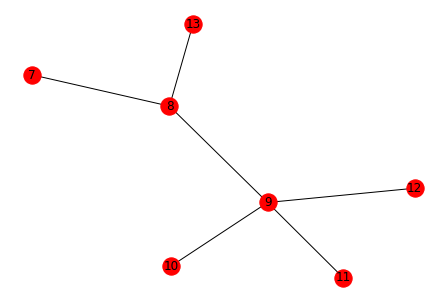

2 


3 


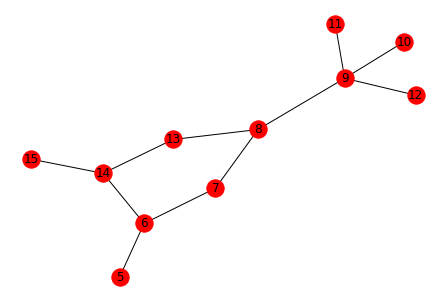

4 


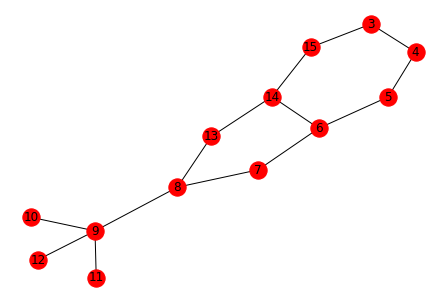

5 


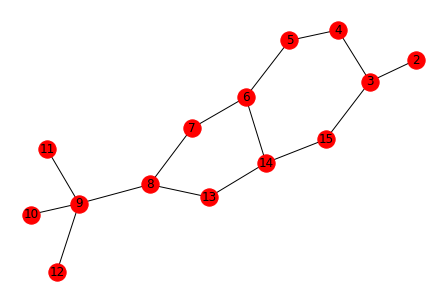

6 


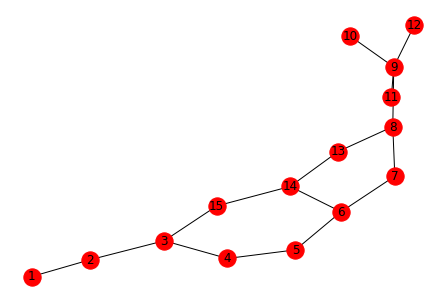

7 


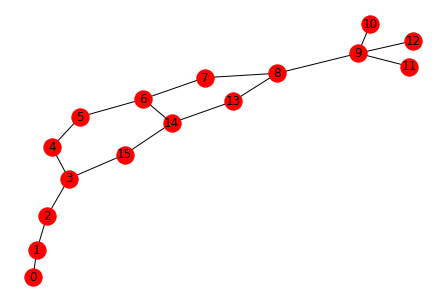

8 None


In [248]:
a=[10,9,11]
for i in range(100):
    a=molutils.nx_induced_graph(G,a)
    print (i , a)
    if a:
        nx.draw(a,with_labels=True)
        plt.show()
    else:
        break

In [226]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True

In [257]:
reload(molutils)

<module 'molutils' from '../../src/main/molutils.py'>

In [258]:
mols = molutils.induced_mols(mol, [10,9,11])
len(mols)

9

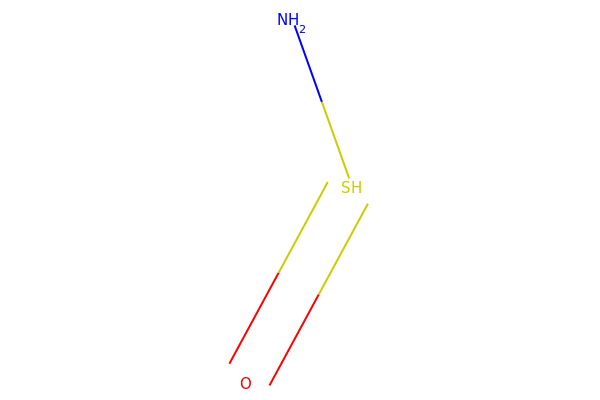

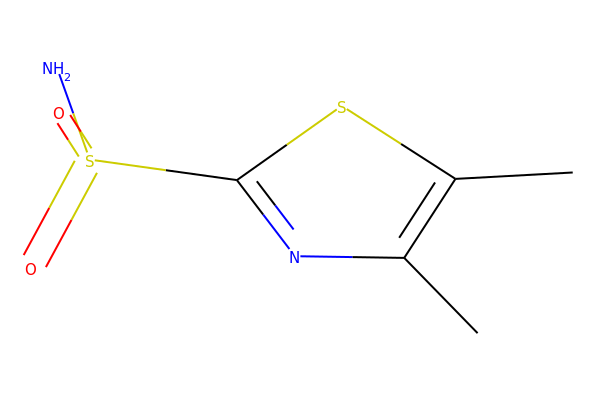

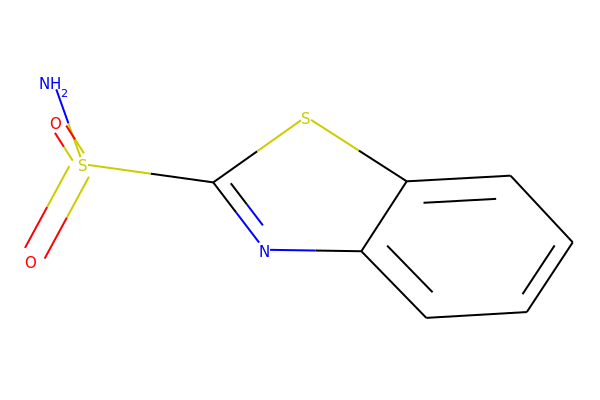

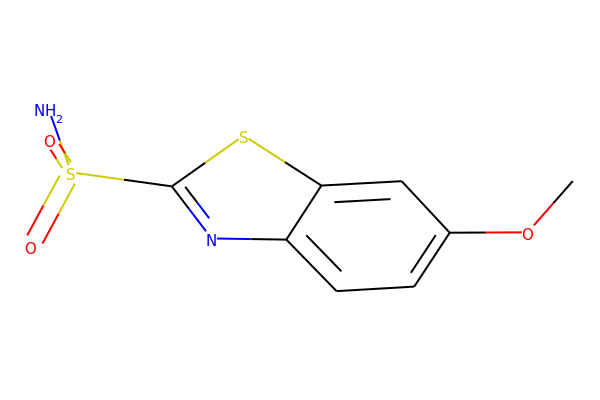

In [259]:
for u in mols:
    display(u)

In [261]:
for u in mols:
    print(rdMolDescriptors.CalcMolFormula(u), rdMolDescriptors.CalcAsphericity(u))


H3NOS 0.4916494490666168
CH5NO2S 0.0009041695258384167
CH3N2O2S2 0.26334935974926715
C3H4N2O2S2 0.3757628761935594
C5H6N2O2S2 0.4575118565725461
C7H6N2O2S2 0.5700262266614615
C7H6N2O3S2 0.6545318708969506
C8H8N2O3S2 0.6824123675784483
C9H10N2O3S2 0.6701640004185805


In [263]:
for u in mols:
    print(rdMolDescriptors.CalcMolFormula(u), len(rdMolDescriptors.CalcMORSE(u)))


H3NOS 224
CH5NO2S 224
CH3N2O2S2 224
C3H4N2O2S2 224
C5H6N2O2S2 224
C7H6N2O2S2 224
C7H6N2O3S2 224
C8H8N2O3S2 224
C9H10N2O3S2 224


In [265]:
a=mol.GetAtomWithIdx(0)


In [270]:
[u for u in dir(a) if not u.startswith("_") and  not u.startswith("Set")]

['ClearProp',
 'DescribeQuery',
 'GetAtomMapNum',
 'GetAtomicNum',
 'GetBonds',
 'GetBoolProp',
 'GetChiralTag',
 'GetDegree',
 'GetDoubleProp',
 'GetExplicitBitVectProp',
 'GetExplicitValence',
 'GetFormalCharge',
 'GetHybridization',
 'GetIdx',
 'GetImplicitValence',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsotope',
 'GetMass',
 'GetMonomerInfo',
 'GetNeighbors',
 'GetNoImplicit',
 'GetNumExplicitHs',
 'GetNumImplicitHs',
 'GetNumRadicalElectrons',
 'GetOwningMol',
 'GetPDBResidueInfo',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetSmarts',
 'GetSymbol',
 'GetTotalDegree',
 'GetTotalNumHs',
 'GetTotalValence',
 'GetUnsignedProp',
 'HasProp',
 'HasQuery',
 'InvertChirality',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'NeedsUpdatePropertyCache',
 'UpdatePropertyCache']